# Notebook: Análise Exploratória e Pré-processamento dos Dados

## Introdução

Este notebook faz parte do projeto do Nanodegree 2025/1 da disciplina de Machine Learning & Inteligência Artificial.
Seu objetivo é explorar e preparar os dados para a tarefa de previsão de evasão de estudantes em um curso online síncrono promovido pela PensComp.

---

In [ ]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 9.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode

### Carregamento dos Dados

O dataset original é carregado a partir de um arquivo CSV contendo informações dos usuários. Este arquivo servirá como base para a análise exploratória e limpeza inicial dos dados.

In [ ]:
df = pd.read_csv('dados_projeto_evasao_treino - Copia.csv')

### Entendimento Inicial

In [ ]:
# Estrutura do DF
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            400 non-null    int64  
 1   ds_cidade_usuario                     346 non-null    object 
 2   ts_primeiro_acesso                    400 non-null    int64  
 3   ts_ultimo_acesso                      400 non-null    int64  
 4   nr_dias_desde_primeiro_acesso         400 non-null    int64  
 5   nr_dias_desde_ultimo_acesso           400 non-null    int64  
 6   nr_atividades_sinalizadas             400 non-null    int64  
 7   nr_atividades_mapeadas                400 non-null    int64  
 8   nr_discussoes_forum_postadas          400 non-null    int64  
 9   nr_questionarios_abandonados          400 non-null    int64  
 10  nr_questionarios_finalizados          400 non-null    int64  
 11  vl_medio_tempo_ques

In [ ]:
# Amostra dos dados
df.head()

,Unnamed: 0,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
0,1,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
1,3,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
2,4,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
3,5,NaN,1692744534,1693928454,20,6,0,4,0,0,...,0,1.0,NaN,NaN,1,62,1.0,0,NaN,NaN
4,6,Campinas,0,0,19612,19612,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


In [ ]:
# Classificação das colunas por tipo de prefixo
categoricas = [col for col in df.columns if col.startswith("ds_")]
temporais = [col for col in df.columns if col.startswith("ts_")]
numericas_nr = [col for col in df.columns if col.startswith("nr_")]
numericas_vl = [col for col in df.columns if col.startswith("vl_")]

print("\nColunas categóricas:", categoricas)
print("Colunas temporais:", temporais)
print("Colunas numéricas (contagem - nr_):", numericas_nr)
print("Colunas numéricas (valores/escalares - vl_):", numericas_vl)


Colunas categóricas: ['ds_cidade_usuario']
Colunas temporais: ['ts_primeiro_acesso', 'ts_ultimo_acesso']
Colunas numéricas (contagem - nr_): ['nr_dias_desde_primeiro_acesso', 'nr_dias_desde_ultimo_acesso', 'nr_atividades_sinalizadas', 'nr_atividades_mapeadas', 'nr_discussoes_forum_postadas', 'nr_questionarios_abandonados', 'nr_questionarios_finalizados', 'nr_intervalos_uso', 'nr_dias_uso', 'nr_interacoes_usuario', 'nr_dias_engajamento_discussao', 'nr_dias_engajamento_questionario', 'nr_engajamento_discussao', 'nr_engajamento_questionario', 'nr_questoes_respondidas', 'nr_questoes_corretas', 'nr_questoes_erradas', 'nr_questoes_parciais', 'nr_itens_avaliados', 'nr_itens_nao_respondidos', 'nr_submissoes_codigo']
Colunas numéricas (valores/escalares - vl_): ['vl_medio_tempo_questionario', 'vl_medio_tempo_questionario_avaliado', 'vl_desempenho_questionario', 'vl_medio_atividade_diaria', 'vl_engajamento_usuario_por_intervalo', 'vl_engajamento_usuario_intradia', 'vl_desempenho_usuario', 'vl_m

### Verificação de itens ausentes

In [ ]:
# Verificando colunas que possuam ao menos um item nulo
missing = (df.isnull().mean() * 100).sort_values(ascending=True)

print("\nProporção de valores ausentes por coluna (%):")
print(missing[missing > 0].round(2))


Proporção de valores ausentes por coluna (%):
ds_cidade_usuario                       13.50
vl_medio_atividade_diaria               47.75
nr_intervalos_uso                       47.75
vl_desempenho_usuario                   71.75
vl_media_notas                          71.75
vl_medio_tempo_questionario             72.25
vl_medio_tempo_questionario_avaliado    73.25
vl_engajamento_notas                    84.75
vl_media_questoes_por_dia               84.75
vl_engajamento_usuario_por_intervalo    92.75
vl_engajamento_usuario_intradia         92.75
vl_desempenho_questionario              93.25
vl_submissoes_por_dias_ativos           98.00
vl_media_submissoes_codigo              99.00
dtype: float64


###  Análise de Cardinalidade - PROFESSOR DISSE QUE NÃO FAZ SENTIDO TER ESSA ANALISE E QUE DEVERIAMOS EXPLICAR DO PORQUE NÃO PRECISA DESSE GRÁFICO OU PODEMOS SÓ REMOVE-LO

<ipython-input-30-1a22dcc5caf0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cardinalidade.values, y=cardinalidade.index, palette="crest")


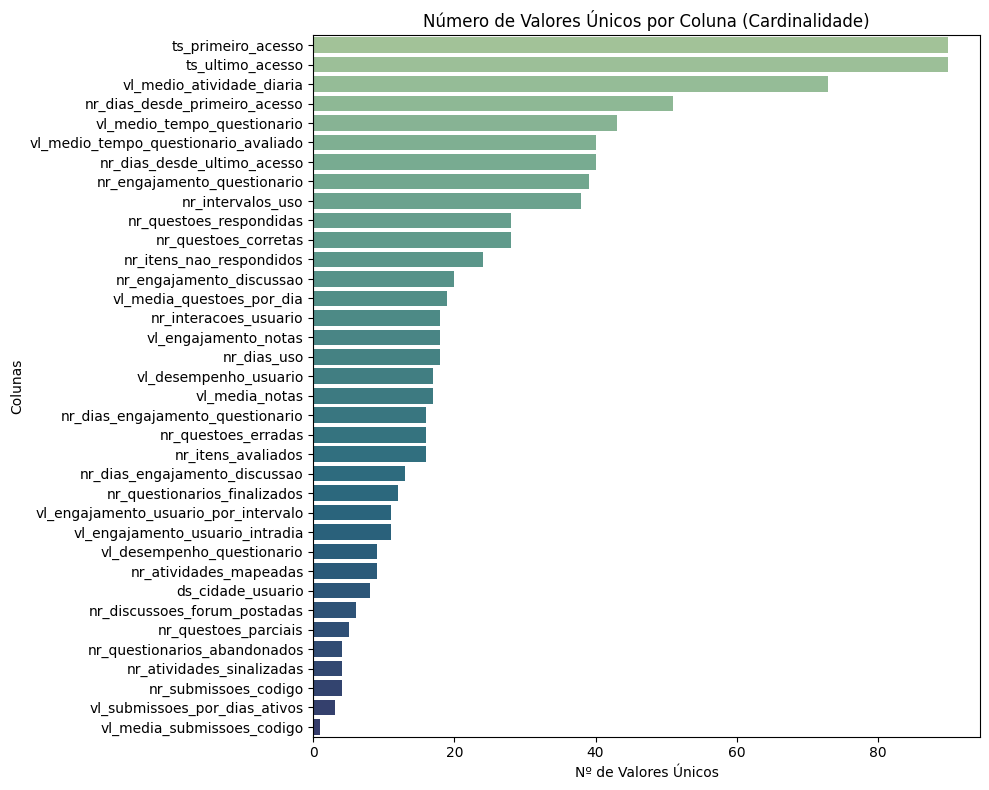

In [ ]:
cardinalidade = df.nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=cardinalidade.values, y=cardinalidade.index, palette="crest")
plt.title("Número de Valores Únicos por Coluna (Cardinalidade)")
plt.xlabel("Nº de Valores Únicos")
plt.ylabel("Colunas")
plt.tight_layout()
plt.show()


Primeiro vamos remover a coluna que representaria o ID para não influenciar na predição e após isso remover todas as linhas onde na coluna ts_primeiro_acesso esteja zerado "0", pois isso simboliza que o aluno nunca acessou o portal

In [ ]:
df = df.drop("Unnamed: 0", axis=1)


In [ ]:
df = df[df['ts_primeiro_acesso'] != 0]

In [ ]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
3,NaN,1692744534,1693928454,20,6,0,4,0,0,1,...,0,1.000000,NaN,NaN,1,62,1.000000,0,NaN,NaN
5,NaN,1689612221,1693937636,56,6,0,0,0,0,4,...,1,0.991837,0.525,0.325,21,42,0.990476,47,6.7143,15.6667
7,Campinas,1692821395,1692905369,19,18,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
8,Campinas,1693359554,1693359711,13,13,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
9,NaN,1693187526,1693187600,15,15,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


Agora fizemos a conversao dos dados TS para um datetime

In [ ]:
df['ts_primeiro_acesso'] = pd.to_datetime(df['ts_primeiro_acesso'], unit='s')
df['ts_ultimo_acesso'] = pd.to_datetime(df['ts_ultimo_acesso'], unit='s')

In [ ]:
df.head()

,ds_cidade_usuario,ts_primeiro_acesso,ts_ultimo_acesso,nr_dias_desde_primeiro_acesso,nr_dias_desde_ultimo_acesso,nr_atividades_sinalizadas,nr_atividades_mapeadas,nr_discussoes_forum_postadas,nr_questionarios_abandonados,nr_questionarios_finalizados,...,nr_questoes_parciais,vl_desempenho_usuario,vl_media_questoes_por_dia,vl_engajamento_notas,nr_itens_avaliados,nr_itens_nao_respondidos,vl_media_notas,nr_submissoes_codigo,vl_media_submissoes_codigo,vl_submissoes_por_dias_ativos
3,NaN,2023-08-22 22:48:54,2023-09-05 15:40:54,20,6,0,4,0,0,1,...,0,1.000000,NaN,NaN,1,62,1.000000,0,NaN,NaN
5,NaN,2023-07-17 16:43:41,2023-09-05 18:13:56,56,6,0,0,0,0,4,...,1,0.991837,0.525,0.325,21,42,0.990476,47,6.7143,15.6667
7,Campinas,2023-08-23 20:09:55,2023-08-24 19:29:29,19,18,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
8,Campinas,2023-08-30 01:39:14,2023-08-30 01:41:51,13,13,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN
9,NaN,2023-08-28 01:52:06,2023-08-28 01:53:20,15,15,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,NaN,0,NaN,NaN


limpeza e formatação coluna cidade usuario

In [ ]:
print(df['ds_cidade_usuario'].unique())

[nan 'Campinas' 'São Paulo' 'curitiba' 'Uru' 'Curitiba' 'Blumenau '
 'brasilia' 'Holambra' 'campinas' 'sao paulo']


In [ ]:
import unidecode

df['ds_cidade_usuario'] = (
    df['ds_cidade_usuario']
    .astype(str)
    .str.strip()
    .str.upper()
    .apply(unidecode.unidecode)
)

In [ ]:
df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)

<ipython-input-20-3223286759>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ds_cidade_usuario'].replace("NAN", "CIDADE NAO INFORMADA", inplace=True)


In [ ]:
print(df['ds_cidade_usuario'].unique())

['CIDADE NAO INFORMADA' 'CAMPINAS' 'SAO PAULO' 'CURITIBA' 'URU' 'BLUMENAU'
 'BRASILIA' 'HOLAMBRA']


### Análise de Engajamento por Cidade

Investigar se há diferenças regionais no engajamento, usando ds_cidade_usuario.

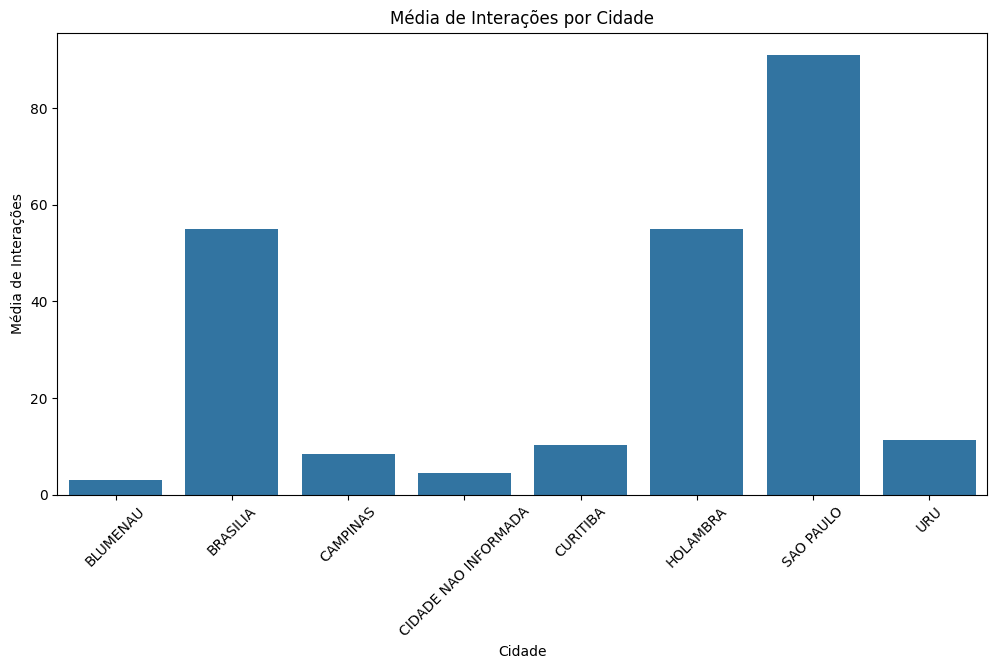

In [ ]:
# Média de engajamento por cidade
city_stats = df.groupby('ds_cidade_usuario')[['nr_interacoes_usuario',
                                              'vl_desempenho_usuario',
                                              'nr_questionarios_finalizados']].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=city_stats, x='ds_cidade_usuario', y='nr_interacoes_usuario')
plt.xticks(rotation=45)
plt.title('Média de Interações por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Média de Interações')
plt.show()

In [ ]:
df.to_csv("dados_convertidos.csv", index=False)


🚫 Mas nesse caso específico, com seu objetivo (prever evasão), eu não removeria logo de cara. Por quê?
Porque o "estar ausente" é informativo. Ou seja:

O aluno não fez submissão de código → Pode ser sinal de desengajamento.

O aluno não teve engajamento intradia → Pode ser indício de desinteresse.

Esses "nulos" representam comportamento, não erro.

### Distribuição do Desempenho Geral dos Alunos

O gráfico de desempenho mostra como os alunos estão performando academicamente, com base na métrica `vl_desempenho_usuario`, que varia de 0 a 1. A curva indica que a maioria dos usuários possui desempenho alto, com uma média em torno de **0.88**.

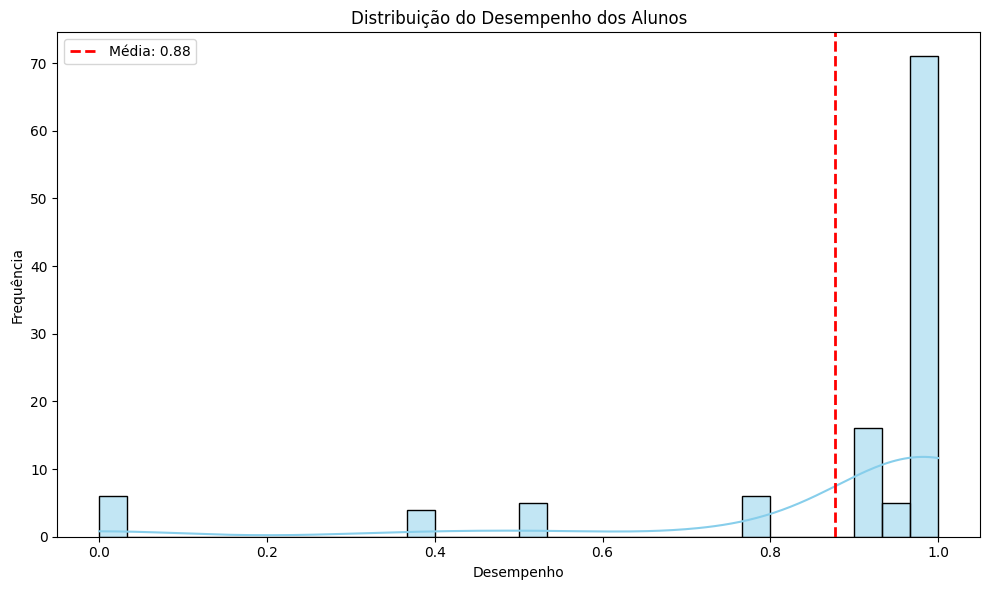

In [ ]:
df['vl_desempenho_usuario'] = pd.to_numeric(df['vl_desempenho_usuario'], errors='coerce')
media_geral = df['vl_desempenho_usuario'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df['vl_desempenho_usuario'], bins=30, kde=True, color='skyblue')
plt.axvline(media_geral, color='red', linestyle='--', linewidth=2, label=f'Média: {media_geral:.2f}')
plt.title('Distribuição do Desempenho dos Alunos')
plt.xlabel('Desempenho')
plt.ylabel('Frequência')
plt.legend()
plt.tight_layout()
plt.show()


### Distribuição dos Dias Desde o Último Acesso

Esse gráfico analisa o comportamento de uso da plataforma, mostrando há quantos dias cada usuário realizou seu último acesso. A maior parte dos usuários acessou recentemente, mas a média está em **44 dias**.

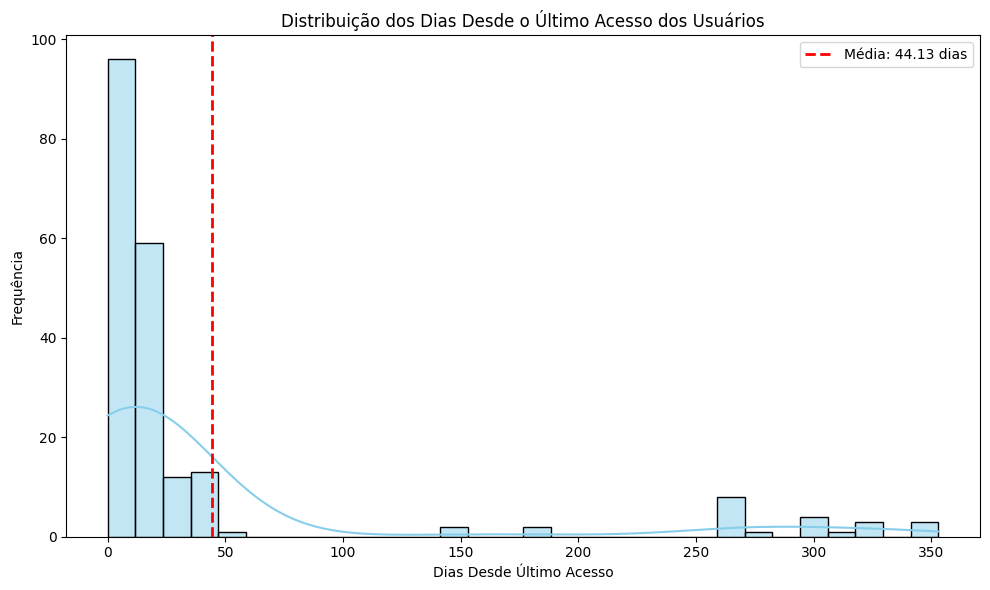

In [ ]:

# Selecionar  a coluna de dias desde o último acesso
dias = df['nr_dias_desde_ultimo_acesso']

# Calcular a média
media_dias = dias.mean()

# Plotar histograma com KDE (curva de densidade)
plt.figure(figsize=(10, 6))
sns.histplot(dias, bins=30, kde=True, color='skyblue')

# Adicionar linha da média
plt.axvline(media_dias, color='red', linestyle='--', linewidth=2, label=f'Média: {media_dias:.2f} dias')

# Títulos e eixos
plt.title("Distribuição dos Dias Desde o Último Acesso dos Usuários")
plt.xlabel("Dias Desde Último Acesso")
plt.ylabel("Frequência")
plt.legend()
plt.tight_layout()
plt.show()


Com a combinação dessas métricas podemos utiliza-las para identificar **perfis de risco** e **tomar ações preventivas** mais eficazes.

## Cruzamento: Desempenho vs. Inatividade

Esse gráfico foi criado para identificar diferentes **perfis de risco de evasão** com base em duas métricas-chave:
- **Desempenho do usuário (`vl_desempenho_usuario`)**: representa a qualidade da participação do aluno nas atividades da plataforma.
- **Dias desde o último acesso (`nr_dias_desde_ultimo_acesso`)**: indica o nível de engajamento e presença do aluno na plataforma.

Ao cruzarmos essas duas variáveis, conseguimos classificar os alunos em 4 grupos estratégicos:

1. Alto Risco = Baixo desempenho **e** muita inatividade (> 60 dias);
2. Reengajamento = Bom desempenho, mas sem acessar há muito tempo;
3. Apoio Pedagógico = Acessa com frequência, mas tem baixo desempenho;
4. Estável = Acessa com frequência **e** tem bom desempenho.


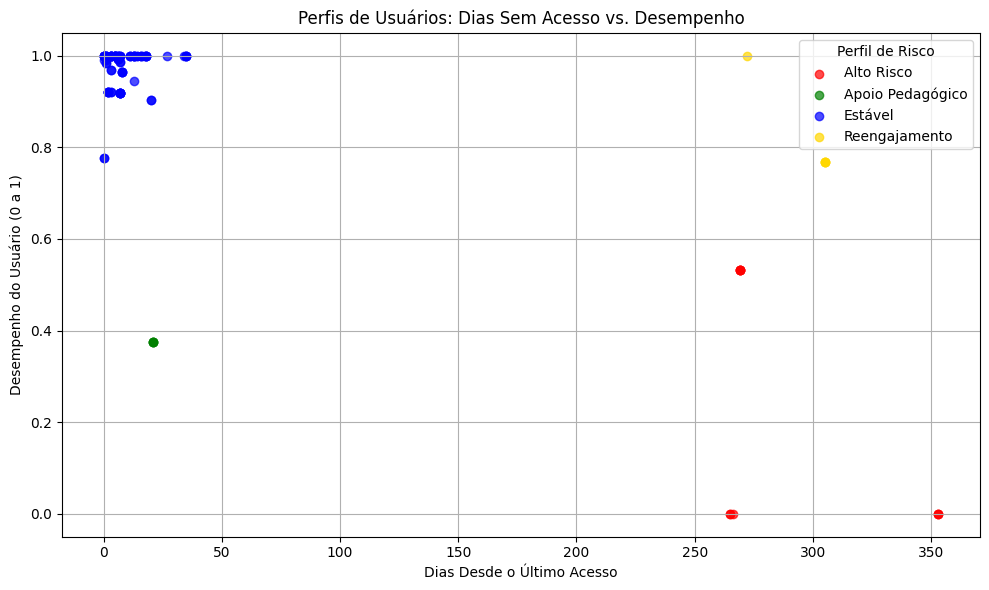

In [ ]:
# Classificar perfis com base em regras simples
def classificar_perfil(row):
    if row['vl_desempenho_usuario'] < 0.7 and row['nr_dias_desde_ultimo_acesso'] > 60:
        return 'Alto Risco'
    elif row['vl_desempenho_usuario'] >= 0.7 and row['nr_dias_desde_ultimo_acesso'] > 60:
        return 'Reengajamento'
    elif row['vl_desempenho_usuario'] < 0.7 and row['nr_dias_desde_ultimo_acesso'] <= 60:
        return 'Apoio Pedagógico'
    else:
        return 'Estável'

# Aplicar classificação ao DataFrame
df['perfil'] = df.apply(classificar_perfil, axis=1)

# Definir cores para cada perfil
cores = {
    'Alto Risco': 'red',
    'Reengajamento': 'gold',
    'Apoio Pedagógico': 'green',
    'Estável': 'blue'
}

# Criar gráfico de dispersão colorido
plt.figure(figsize=(10, 6))

for perfil, grupo in df.groupby('perfil'):
    plt.scatter(
        grupo['nr_dias_desde_ultimo_acesso'],
        grupo['vl_desempenho_usuario'],
        color=cores[perfil],
        label=perfil,
        alpha=0.7
    )

# Configurações finais
plt.title("Perfis de Usuários: Dias Sem Acesso vs. Desempenho")
plt.xlabel("Dias Desde o Último Acesso")
plt.ylabel("Desempenho do Usuário (0 a 1)")
plt.legend(title="Perfil de Risco")
plt.grid(True)
plt.tight_layout()
plt.show()

A partir da visualização acima, percebemos que olhar para desempenho ou acesso separadamente pode ocultar padrões importantes.

Por exemplo:
- Um aluno com nota alta, mas sem entrar há 90 dias, pode estar prestes a abandonar.
- Um aluno que acessa todos os dias, mas vai mal nas tarefas, precisa de reforço — não de reengajamento.

Esse tipo de análise combinada é essencial para um modelo mais eficaz de prevenção à evasão, permitindo ações personalizadas conforme o perfil de cada aluno.